In [1]:
%matplotlib inline


# Watershed segmentation


The watershed is a classical algorithm used for **segmentation**, that
is, for separating different objects in an image.

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. You start filling every isolated valleys (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created gives you the segmentation result. This is the intuition behind the watershed

What we do is to give different labels for our object we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. [1](https://docs.opencv.org/trunk/d3/db4/tutorial_py_watershed.html)

In this case initial mask file is used to mark the LV labels as 255, then the first pixel in the image pixel at (0, 0) is marked as background (marked as 1).

Runtime of watershed: 0.0236740112305 seconds


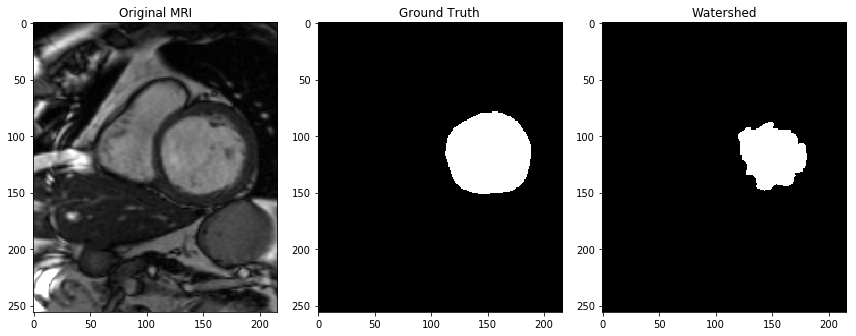

In [2]:
from skimage import io
from skimage.segmentation import random_walker
from skimage.morphology import watershed
import numpy as np
import matplotlib.pyplot as plt
import timeit

mri_image = io.imread("MRI.png")
init_mask = io.imread("InitialMask.png")
ground_truth = io.imread("GT.png")

init_mask[0, 0] = 1 # second marker for watershed (needs 2 seeds, seed 1 is provided by mask file)

start = timeit.default_timer()

labels = watershed(mri_image, init_mask)

stop = timeit.default_timer()

print("Runtime of watershed: " + str(stop - start) + " seconds") # in seconds

labels[labels==1] = 0 # we want 0 for background and 255 for foreground

fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
ax = axes.ravel()

ax[0].imshow(mri_image, cmap=plt.cm.gray)
ax[0].set_title('Original MRI')
ax[1].imshow(ground_truth, cmap=plt.cm.gray)
ax[1].set_title('Ground Truth')
ax[2].imshow(labels, cmap=plt.cm.gray)
ax[2].set_title('Watershed')

fig.tight_layout()
plt.show()


# Evaluation metrics [2](https://en.wikipedia.org/wiki/Precision_and_recall), [3](https://en.wikipedia.org/wiki/Hausdorff_distance)

### Precision

![alt text](image/1.png)

### Recall

![alt text](image/2.png)

### F1 (Dice)

![alt text](image/3.png)

### Hausdorff distance

![alt text](image/4.png)

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.spatial.distance import directed_hausdorff

gt = np.asarray(ground_truth).astype(np.bool)
pred = np.asarray(labels).astype(np.bool)

intersection = np.logical_and(gt, pred)
print("Dice score: " + str(2. * intersection.sum() / (gt.sum() + pred.sum())))

print("precision: " + str(precision_score(gt.flatten(), pred.flatten())))
print("accuracy: " + str(accuracy_score(gt.flatten(), pred.flatten())))
print("recall: " + str(recall_score(gt.flatten(), pred.flatten())))
print("f1 (Dice): " + str(f1_score(gt.flatten(), pred.flatten())))
print("symmetric (original) hausdorff distance: " +
      str(max(directed_hausdorff(gt, pred)[0], directed_hausdorff(pred, gt)[0])))


Dice score: 0.734406438632
precision: 1.0
accuracy: 0.966579861111
recall: 0.580286168521
f1 (Dice): 0.734406438632
symmetric (original) hausdorff distance: 4.12310562562
